In [1]:
import os,sys
# torch 
import torch # pytorch package, allows using GPUs
import torch.nn.functional as F # implements forward and backward definitions of an autograd operation
from torch import nn, optim
from torch.nn.modules import Module
from torchvision import datasets # load data
from torch.autograd import Variable
import torch.optim as optim

#own modules

from run_training import run_analysis
from Networks import *
from Visualization import *

if torch.cuda.is_available():
    device = torch.device('cuda')
    print("Using cuda device for all tensor calculations.")
else:
    device = torch.device('cpu')
    print("Using cpu device for all tensor calculations.")

Using cuda device for all tensor calculations.


In [2]:
nb_trials = 500
epochs = 100

Training Simple convolutional network with the following architecture:
 plain_model(
  (ch1): ModuleList(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
    (4): ReLU()
  )
  (ch2): ModuleList(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
    (4): ReLU()
  )
  (layers): ModuleList(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1024, out_features=64, bias=True)
    (2): Linear(in_features=64, out_features=64, bias=True)
    (3): Linear(in_features=64, out_features=32, bias=True)
    (4): Linear(in_features=32, out_features=2, bias=True)
    (5): Sigmoid()
  )
)


  0%|          | 0/500 [00:00<?, ?it/s]

[Final Result] Accuracy(Training): (97.900%), Accuracy(Test): (97.900%)
ran for a total of 100 epochs

 

[Final Result] Accuracy(Training): (97.000%), Accuracy(Test): (97.000%)
ran for a total of 100 epochs

 

[Final Result] Accuracy(Training): (98.300%), Accuracy(Test): (98.300%)
ran for a total of 100 epochs

 

[Final Result] Accuracy(Training): (97.900%), Accuracy(Test): (97.900%)
ran for a total of 100 epochs

 

[Final Result] Accuracy(Training): (97.500%), Accuracy(Test): (97.600%)
ran for a total of 100 epochs

 

[Final Result] Accuracy(Training): (98.300%), Accuracy(Test): (98.300%)
ran for a total of 100 epochs

 

[Final Result] Accuracy(Training): (97.800%), Accuracy(Test): (97.800%)
ran for a total of 100 epochs

 

[Final Result] Accuracy(Training): (96.800%), Accuracy(Test): (96.800%)
ran for a total of 100 epochs

 

[Final Result] Accuracy(Training): (97.700%), Accuracy(Test): (97.700%)
ran for a total of 100 epochs

 

[Final Result] Accuracy(Training): (97.700%), 

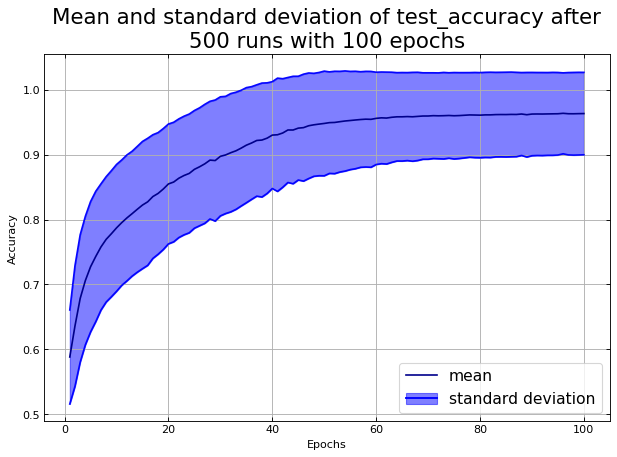

In [3]:
pm_results = run_analysis(plain_model, nb_trials, epochs, [64, 64, 32], device, lr=.01, BN=False, DO=None)

Training Improved convolutional network with the following architecture:
 plain_model(
  (ch1): ModuleList(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
    (4): ReLU()
  )
  (ch2): ModuleList(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
    (4): ReLU()
  )
  (layers): ModuleList(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1024, out_features=64, bias=True)
    (2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Linear(in_features=64, out_features=64, bias=True)
    (4): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): Linear(in_fe

  0%|          | 0/500 [00:00<?, ?it/s]

[Final Result] Accuracy(Training): (97.700%), Accuracy(Test): (99.700%)
ran for a total of 100 epochs

 

[Final Result] Accuracy(Training): (97.000%), Accuracy(Test): (99.800%)
ran for a total of 100 epochs

 

[Final Result] Accuracy(Training): (96.700%), Accuracy(Test): (99.900%)
ran for a total of 100 epochs

 

[Final Result] Accuracy(Training): (97.700%), Accuracy(Test): (99.400%)
ran for a total of 100 epochs

 

[Final Result] Accuracy(Training): (96.900%), Accuracy(Test): (99.500%)
ran for a total of 100 epochs

 

[Final Result] Accuracy(Training): (98.700%), Accuracy(Test): (99.800%)
ran for a total of 100 epochs

 

[Final Result] Accuracy(Training): (97.600%), Accuracy(Test): (99.500%)
ran for a total of 100 epochs

 

[Final Result] Accuracy(Training): (96.600%), Accuracy(Test): (99.600%)
ran for a total of 100 epochs

 

[Final Result] Accuracy(Training): (97.000%), Accuracy(Test): (99.500%)
ran for a total of 100 epochs

 

[Final Result] Accuracy(Training): (97.600%), 

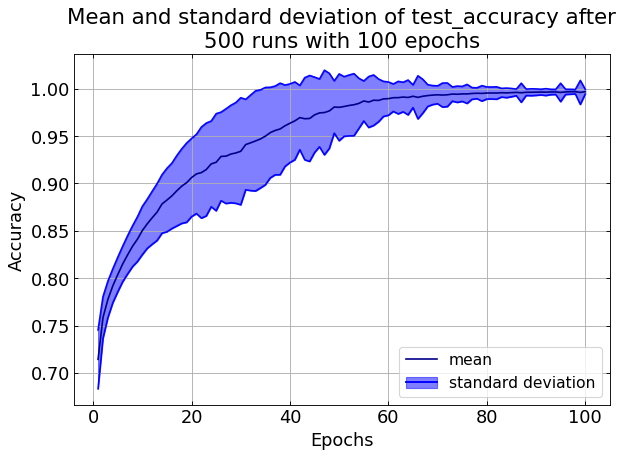

In [4]:
pmi_results = run_analysis(plain_model, nb_trials, epochs, [64, 64, 32], device, lr=.01)

Training Weight sharing network with the following architecture:
 ws_model(
  (conv): ModuleList(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
    (4): ReLU()
  )
  (layers): ModuleList(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1024, out_features=64, bias=True)
    (2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Linear(in_features=64, out_features=64, bias=True)
    (4): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): Linear(in_features=64, out_features=32, bias=True)
    (6): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Linear(in_features=32, out_features=2, bias=True)
    (8): Dropout(p=0.25, inplace=False)
    (9): Sigmoid()
  )
)


  0%|          | 0/500 [00:00<?, ?it/s]

[Final Result] Accuracy(Training): (96.700%), Accuracy(Test): (99.900%)
ran for a total of 100 epochs

 

[Final Result] Accuracy(Training): (97.100%), Accuracy(Test): (99.900%)
ran for a total of 100 epochs

 

[Final Result] Accuracy(Training): (97.600%), Accuracy(Test): (100.000%)
ran for a total of 100 epochs

 

[Final Result] Accuracy(Training): (96.500%), Accuracy(Test): (99.700%)
ran for a total of 100 epochs

 

[Final Result] Accuracy(Training): (97.000%), Accuracy(Test): (99.700%)
ran for a total of 100 epochs

 

[Final Result] Accuracy(Training): (95.600%), Accuracy(Test): (99.000%)
ran for a total of 100 epochs

 

[Final Result] Accuracy(Training): (97.000%), Accuracy(Test): (99.800%)
ran for a total of 100 epochs

 

[Final Result] Accuracy(Training): (95.800%), Accuracy(Test): (99.200%)
ran for a total of 100 epochs

 

[Final Result] Accuracy(Training): (96.700%), Accuracy(Test): (99.800%)
ran for a total of 100 epochs

 

[Final Result] Accuracy(Training): (96.300%),

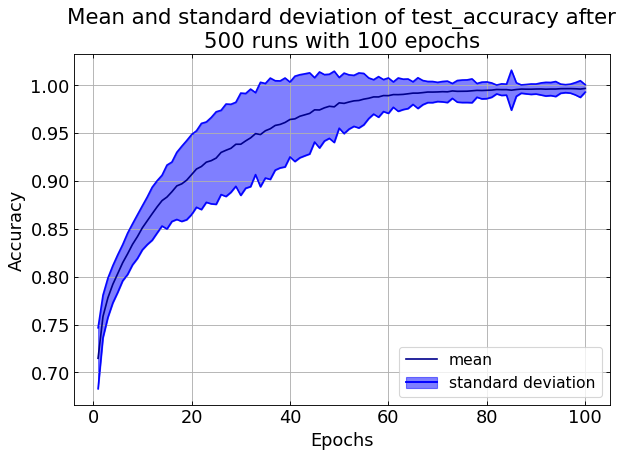

In [5]:
ws_results = run_analysis(ws_model, nb_trials, epochs, [64, 64, 32], device, lr=.01)

Training Simple auxiliary network with the following architecture:
 naive_aux_model(
  (conv): ModuleList(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
    (4): ReLU()
  )
  (aux): ModuleList(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Flatten(start_dim=1, end_dim=-1)
    (3): Linear(in_features=256, out_features=128, bias=True)
    (4): ReLU()
    (5): Linear(in_features=128, out_features=10, bias=True)
  )
  (layers): ModuleList(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1024, out_features=64, bias=True)
    (2): Linear(in_features=64, out_features=64, bias=True)
    (3): Linear(in_features=64, out_features=32, bias=True)
    (4): Linear(in_features=32, out_features=2, bias=True)
    (5): Sigmoid()
  )
)


  0%|          | 0/500 [00:00<?, ?it/s]

[Final Result] Accuracy(Training): (90.100%), Accuracy(Test): (90.400%)
ran for a total of 100 epochs

 

[Final Result] Accuracy(Training): (94.200%), Accuracy(Test): (94.200%)
ran for a total of 100 epochs

 

[Final Result] Accuracy(Training): (91.400%), Accuracy(Test): (91.900%)
ran for a total of 100 epochs

 

[Final Result] Accuracy(Training): (94.900%), Accuracy(Test): (94.900%)
ran for a total of 100 epochs

 

[Final Result] Accuracy(Training): (96.100%), Accuracy(Test): (95.900%)
ran for a total of 100 epochs

 

[Final Result] Accuracy(Training): (86.900%), Accuracy(Test): (83.700%)
ran for a total of 100 epochs

 

[Final Result] Accuracy(Training): (97.200%), Accuracy(Test): (96.700%)
ran for a total of 100 epochs

 

[Final Result] Accuracy(Training): (96.100%), Accuracy(Test): (96.000%)
ran for a total of 100 epochs

 

[Final Result] Accuracy(Training): (91.000%), Accuracy(Test): (91.100%)
ran for a total of 100 epochs

 

[Final Result] Accuracy(Training): (92.200%), 

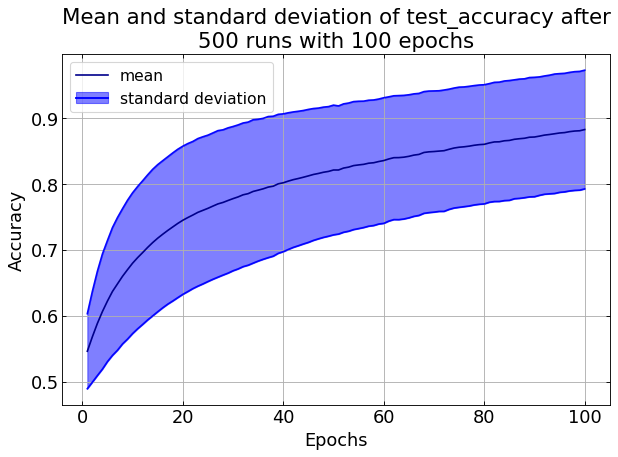

In [6]:
aux_results = run_analysis(naive_aux_model, nb_trials, epochs, [64, 64, 32], device, lr=.01, DO=None, BN=False)

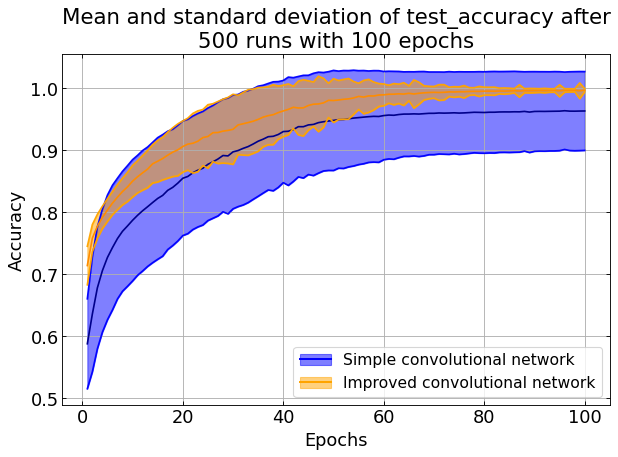

In [7]:
plot_comparison(pm_results, pmi_results, epochs, nb_trials)

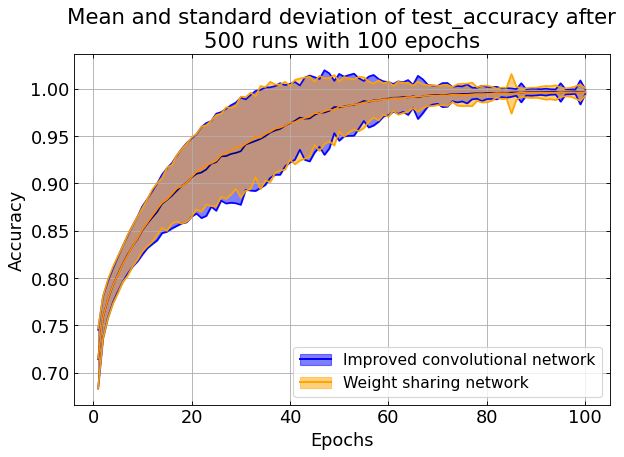

In [8]:
plot_comparison(pmi_results, ws_results, epochs, nb_trials)

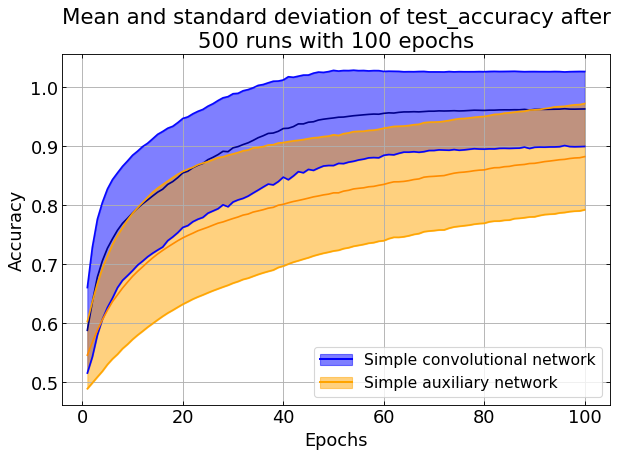

In [9]:
plot_comparison(pm_results, aux_results, epochs, nb_trials)

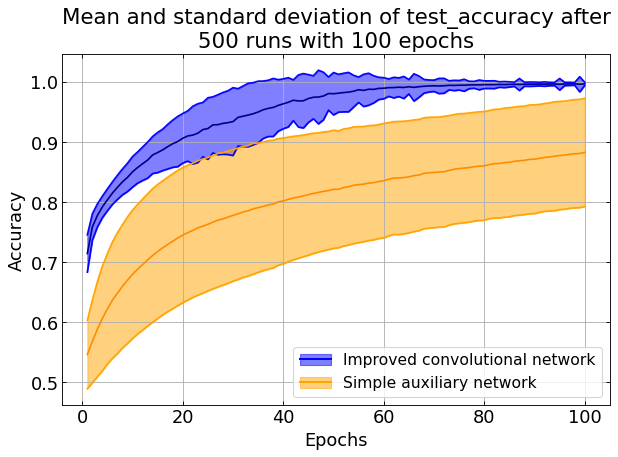

In [10]:
plot_comparison(pmi_results, aux_results, epochs, nb_trials)